## Etapes a faire avant traiter les Analyses

### 1. Importation de tous les bibliotheques


In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # AFD
from sklearn.model_selection import train_test_split  # Division des données
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Évaluation des performances
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import fcluster

### 2. Chargement des donnees

In [85]:
# Charger les données
df = pd.read_csv('data_cleaned.csv')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     45 non-null     object 
 1   PIB_total                                   45 non-null     float64
 2   la concentration moyenne annuelle en PM2,5  45 non-null     float64
 3   PIB_par_habitant                            45 non-null     float64
 4   Depenses_en_education_PIB                   45 non-null     float64
 5   inscriptions au primaire                    45 non-null     float64
 6   Consommation d’énergies renouvelables       45 non-null     float64
 7   Esperance_de_vie                            45 non-null     float64
 8   Depenses_en_sante_par_habitant              45 non-null     float64
 9   Taux_mortalite_infantile                    45 non-null     float64
 10  Acces_electricit

### 3. Choisir les colonnes

In [87]:
# Sélectionner les colonnes numériques 
colonnes_numeriques = [
    'PIB_par_habitant', 'Depenses_en_education_PIB', 
    'Esperance_de_vie', 'Depenses_en_sante_par_habitant', 
    'Taux_mortalite_infantile', 'Acces_electricite', 'Acces_eau_potable', 
    'Taux_pauvrete', 'Taux_chomage', 'Acces_internet', 
    'Ratio_dette_PIB', 'Investissements_directs_etrangers', 
    'Emplois_agriculture'
]

### 4. Standardisation des donnees

In [88]:
# Préparer les données pour l'ACP
X = df[colonnes_numeriques]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-7.60467304e-01,  6.17511942e-04, -2.13789864e+00,
        -6.76993075e-01,  2.81152616e+00,  3.80125257e-02,
        -2.09426058e+00, -1.97154738e-16,  1.06511265e+00,
        -2.05902509e+00, -4.82566446e-16, -1.30665978e-02,
         1.25844662e+00],
       [-5.11922607e-01, -9.83331761e-01, -3.15653742e-01,
        -2.23804654e-01, -5.05764011e-01,  4.05703779e-01,
         7.60257182e-01, -7.16666988e-01,  1.16557885e+00,
         3.08398478e-01, -3.73492931e-01,  1.17757947e-02,
         1.60688529e+00],
       [-5.14486848e-01,  1.30528076e-01, -1.32284370e+00,
        -5.20670620e-01,  4.82168530e-02,  4.05703779e-01,
         3.20210509e-01, -1.97154738e-16,  1.09615030e-01,
         6.38094917e-01, -1.77292665e+00,  5.69502846e-02,
         7.31985099e-01],
       [ 8.15769733e-01, -1.08823683e+00,  1.01353323e+00,
         3.07791817e-01, -7.95944463e-01,  4.05703779e-01,
         7.57599596e-01, -1.97154738e-16, -1.06028173e+00,
         1.25211751e+00,  1.26315704e

**=>** Les données sont maintenant sur une échelle comparable, permettant une analyse significative.

### 5. Calcul de la matrice de correlation

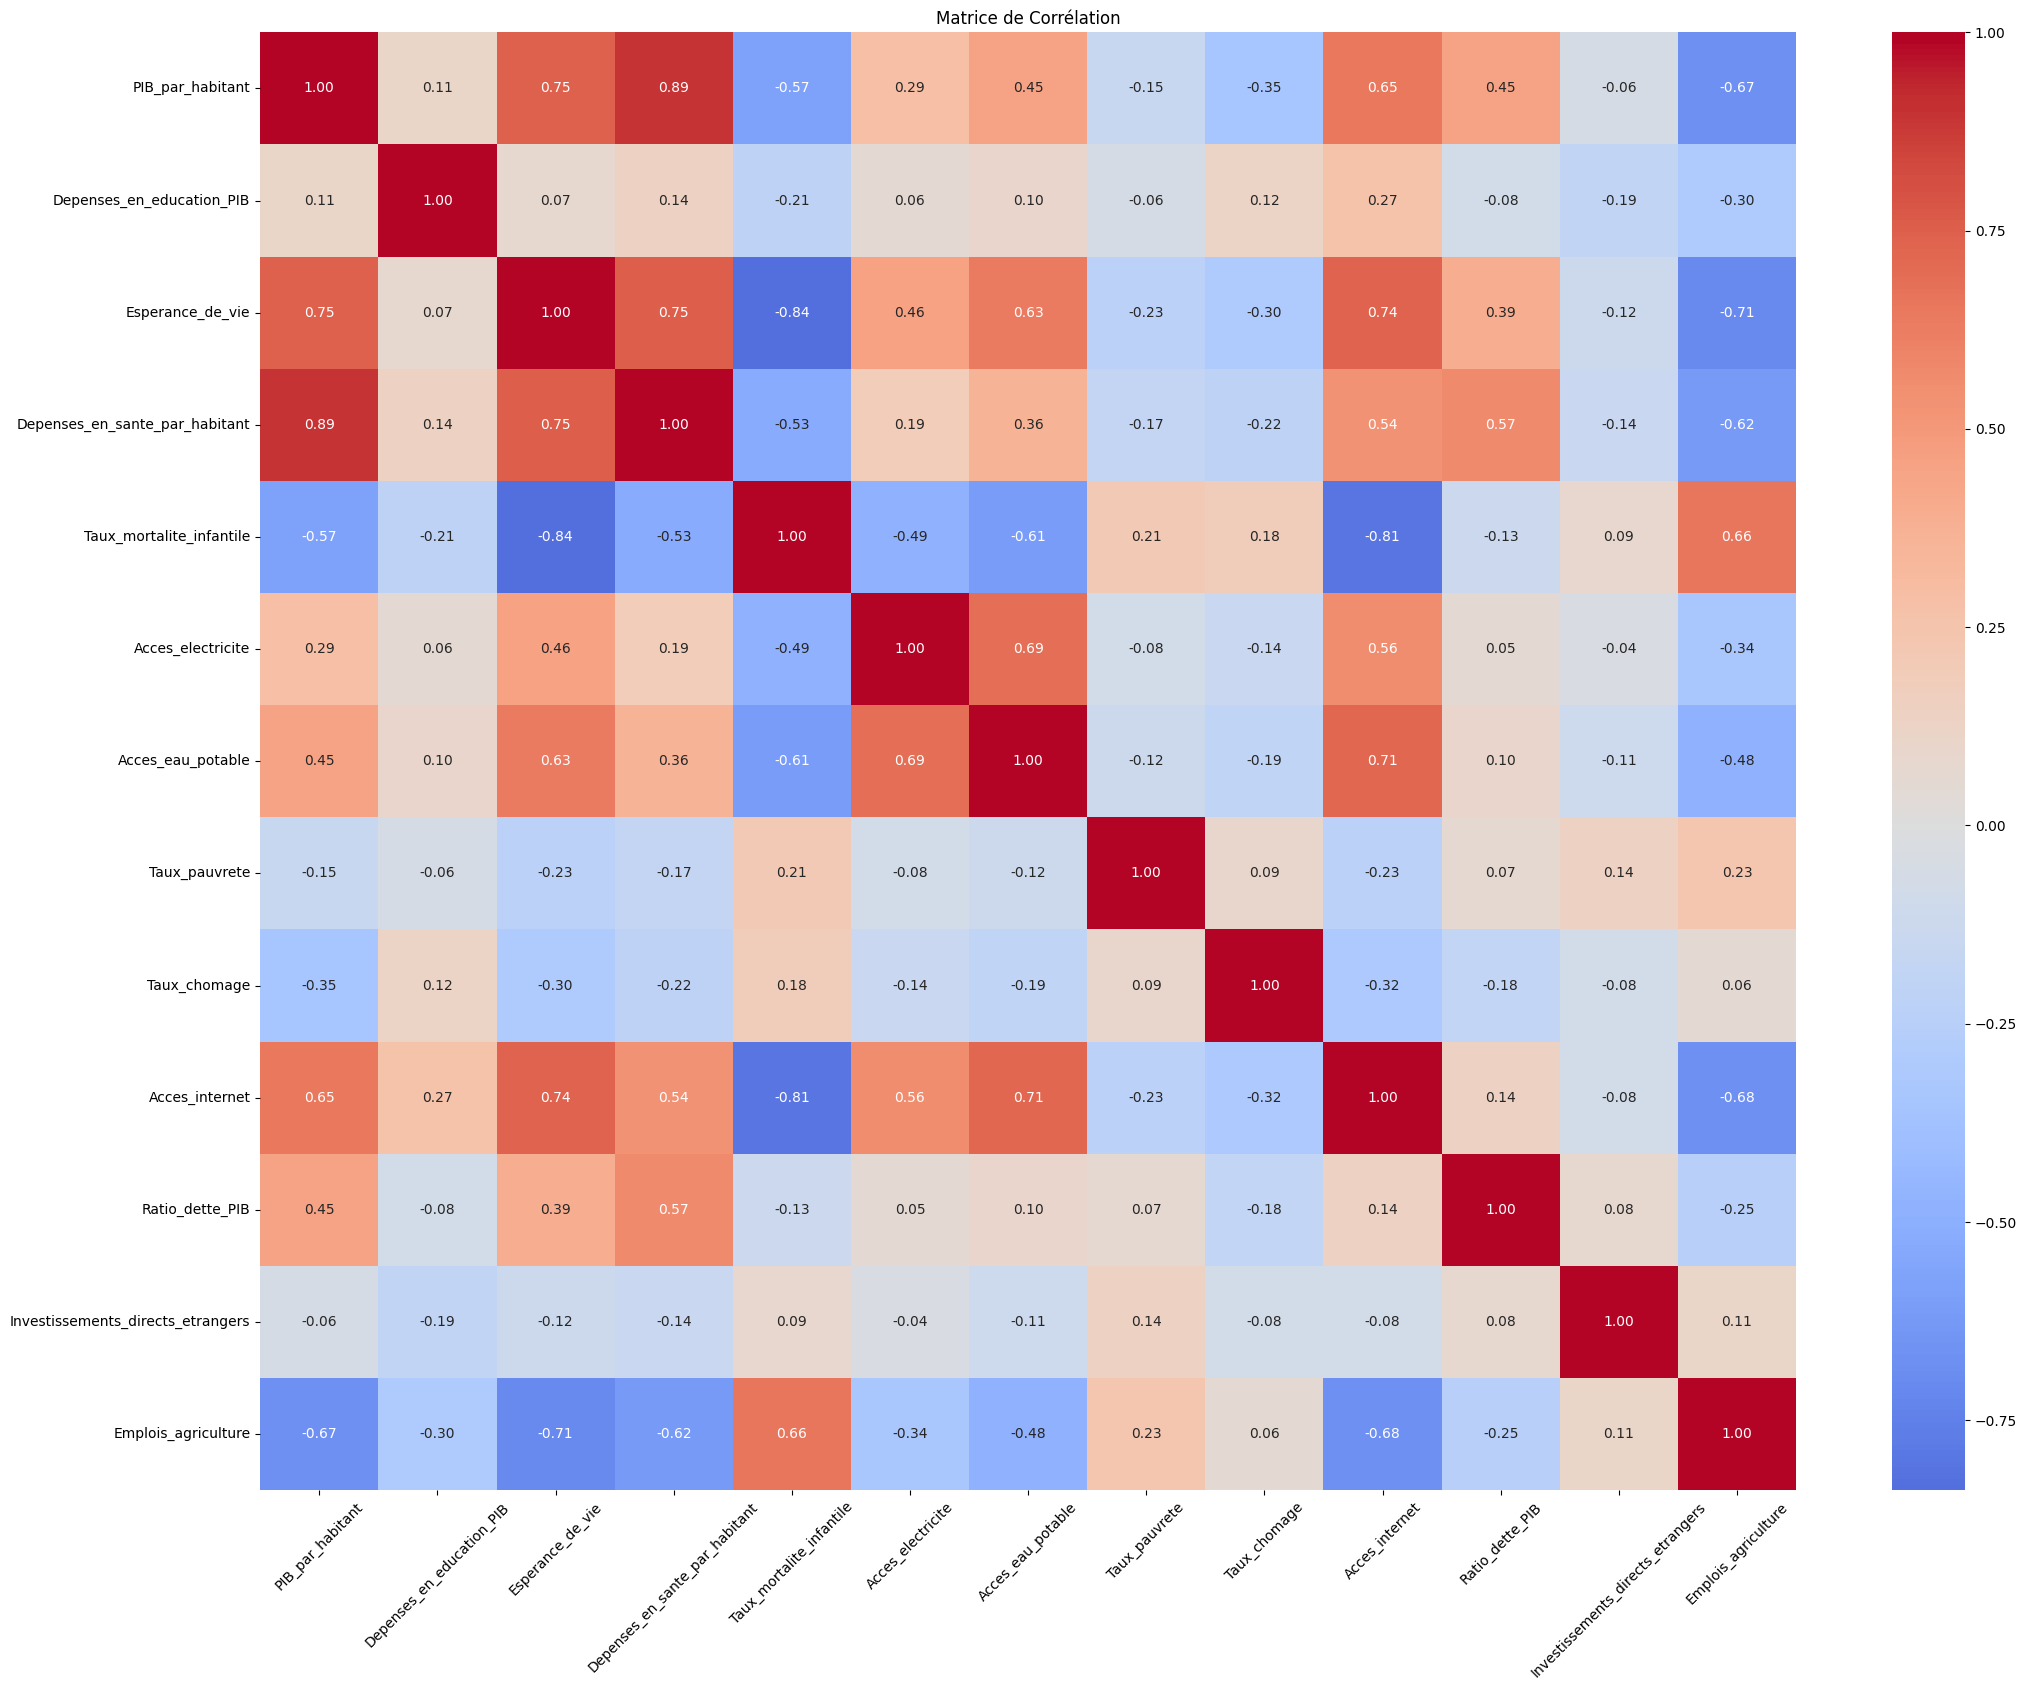

In [89]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(22, 17))  # J'ai légèrement agrandi la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=colonnes_numeriques,  # Ajout des noms des variables sur l'axe x
            yticklabels=colonnes_numeriques)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

En observant la matrice, nous pouvons tirer plusieurs observations :

#### Corrélations fortement positives :

PIB par habitant et dépenses en santé (0.89) : Plus le PIB est élevé, plus les depenses en sante augmente.

---

#### Corrélations fortement négatives :

Espérance de vie et taux de mortalité infantile (-0.84) : Logiquement, ces deux indicateurs sont inversement corrélés.

Emplois agriculture et Espérance de vie (-0.71) : Plus la part d'emplois agricoles est importante, plus l'espérance de vie diminue.

Emplois agriculture et PIB par habitant (-0.67) : Les régions plus agricoles ont tendance à avoir un PIB plus faible.

---

#### Observations intéressantes :

L'accès à l'électricité montre peu de corrélations fortes avec les autres variables (valeurs proches de 0).

L'accès à internet est positivement corrélé avec le PIB (0.65).

Les dépenses en santé par habitant sont positivement corrélées avec l'espérance de vie (0.75).

---


#### Points d'attention :

Le taux de pauvreté montre des corrélations relativement faibles avec la plupart des variables.

Les investissements directs étrangers montrent peu de corrélations significatives avec les autres variables, suggérant qu'ils ne sont pas un indicateur fiable du niveau de développement dans les pays asiatiques.

---

Cette matrice permet de mettre en évidence les liens entre développement économique (PIB), indicateurs sociaux (espérance de vie, éducation) et structure économique (agriculture). Elle suggère qu'il existe un cercle vertueux entre richesse, santé et développement social, tandis que la prédominance de l'agriculture est associée à des indicateurs de développement plus faibles.

# ACP

**Question** : 
Quels sont les principaux indicateurs expliquant les variations des conditions socials et economiques des pays asiatique?

### 1. Extraction des valeurs propres

Les valeurs propres et vecteurs propres de la matrice de corrélation sont extraits pour déterminer les composantes principales.

In [90]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [5.56 1.6  1.32 1.03 0.86 0.79 0.57 0.06 0.08 0.37 0.18 0.3  0.28]
Vecteurs propres :
 [[ 0.36 -0.27 -0.11 -0.01 -0.02  0.07  0.13  0.51 -0.44 -0.51  0.12  0.16
  -0.12]
 [ 0.09  0.33 -0.47  0.28 -0.35  0.51 -0.38  0.08  0.    0.06 -0.15  0.14
  -0.02]
 [ 0.39 -0.07  0.01 -0.03  0.06 -0.11  0.17  0.47  0.51  0.31 -0.45  0.11
  -0.06]
 [ 0.34 -0.33 -0.27  0.01  0.06 -0.04  0.02 -0.64  0.28 -0.29 -0.09  0.33
  -0.14]
 [-0.36 -0.17 -0.05 -0.03  0.11  0.08 -0.31  0.24  0.52 -0.55 -0.01 -0.19
   0.23]
 [ 0.24  0.3   0.42  0.15  0.21 -0.1  -0.45 -0.03  0.03 -0.19 -0.04 -0.13
  -0.58]
 [ 0.31  0.26  0.3   0.11  0.2  -0.04 -0.15 -0.09 -0.16 -0.16 -0.22  0.2
   0.72]
 [-0.11 -0.17  0.18  0.77  0.26  0.34  0.37 -0.02  0.05 -0.   -0.01 -0.06
  -0.04]
 [-0.14  0.25 -0.37  0.44  0.03 -0.71  0.01  0.13  0.04 -0.06  0.16  0.2
   0.01]
 [ 0.37  0.18  0.11  0.   -0.13  0.13  0.1   0.04  0.38  0.05  0.78 -0.01
   0.13]
 [ 0.16 -0.57 -0.08  0.19  0.16 -0.1  -0.56  0.06 -0.13  0.41  0.19

### 2. Illustration des composantes principales

La variance expliquée par chaque composante est visualisée pour choisir le nombre optimal de composantes.

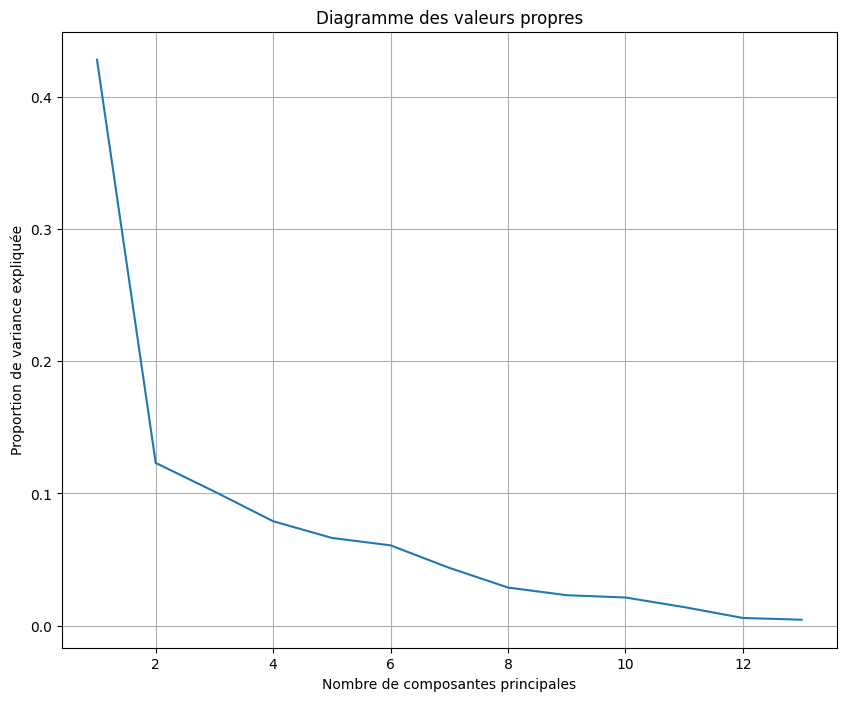

In [91]:
pca = PCA(n_components=len(colonnes_numeriques))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

 Ce graphe représente la proportion de variance expliquée par chaque composante principale.

La forme caractéristique en coude :

- Une forte pente au début (entre les composantes 1 et 2).
- Puis un aplatissement progressif de la courbe.

---

Interprétation des proportions :

- La première composante explique environ 40% de la variance totale.
- La deuxième composante explique environ 12-13%.
- Les composantes suivantes expliquent chacune moins de 10% de la variance.

---

Choix du nombre de composantes à retenir :

- Selon le critère du coude, on pourrait retenir 2 composantes.
- Ces 2 premières composantes expliqueraient environ 52-53% de la variance totale.

### 3. Application de l'ACP

#### 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [92]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### 2. Affichage des nouvelles données projetées sur les composantes principales.

In [93]:
print("Nouvelles données après ACP :")
print(X_pca)

Nouvelles données après ACP :
[[-4.32527872e+00  5.91590452e-01]
 [-5.29120171e-01 -9.18849951e-01]
 [-1.00056819e+00 -1.74583652e+00]
 [ 2.52346402e+00  1.03790577e+00]
 [-1.68240201e+00  4.94231283e-01]
 [-4.76681521e-01 -1.15760512e-01]
 [ 1.78152310e+00 -7.48247427e-01]
 [-2.35979894e+00  1.65004181e+00]
 [ 8.18256383e-01 -4.20152598e-01]
 [ 3.40051348e+00 -1.94796298e+00]
 [-7.44412755e-01 -5.73189213e-01]
 [-2.67065399e+00  1.04401975e+00]
 [-1.62518252e+00  1.19167893e-01]
 [ 2.28322113e-01 -7.11449639e-01]
 [-7.01343956e-01 -1.40345709e+00]
 [ 4.05974665e+00  4.68864796e-01]
 [ 4.85378022e+00  4.26698422e+00]
 [ 3.63836302e-01 -1.68079529e+00]
 [ 2.80621585e-01 -1.69958294e+00]
 [ 3.29794153e+00 -3.57893591e-01]
 [ 2.43495809e+00 -5.06208240e-01]
 [-3.90806111e-01 -1.20304202e+00]
 [-2.74270469e+00  1.02556322e+00]
 [ 4.70363176e-01 -1.86418390e-01]
 [ 1.03231289e+00 -8.57341087e-01]
 [ 1.50116960e+00 -6.84867228e-01]
 [-9.23455054e-01 -1.11976506e-03]
 [-3.75692207e+00  1.8957

#### 3. Visualisation des données dans l'espace des deux premières composantes principales.

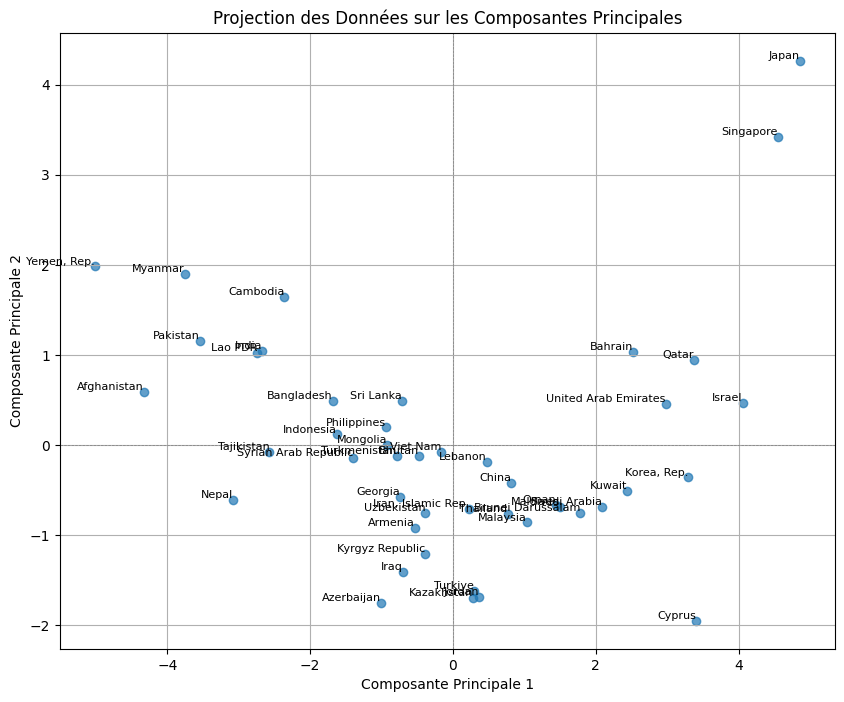

In [94]:
country_names = df['Country']

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Annotate points with country names
for i, country in enumerate(country_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=8, ha='right', va='bottom')

plt.show()


Ce graphique montre la projection des pays asiatiques sur les deux premières composantes principales (CP1 et CP2) issues de l'Analyse en Composantes Principales (ACP), basée sur des indicateurs provenant de l'API de la Banque Mondiale.

1. Distribution des pays :
- Les pays sont bien dispersés dans l'espace des composantes principales, suggérant une diversité dans les indicateurs analysés.
- Point isolé : Un pays se distingue fortement par ses valeurs sur les deux axes, ce qui pourrait refléter une particularité ou une anomalie.
- Concentration centrale : Plusieurs pays se regroupent autour de l'origine (0,0), suggérant des profils similaires pour ces indicateurs.

2. Interprétation des axes :

**Composante Principale 1 (CP1) :**

- Intervalle : de -4 à 4.
- Cette composante explique environ 40% de la variance totale et capte les différences majeures entre les pays asiatiques selon les indicateurs.
- Les pays avec des valeurs extrêmes sur cet axe présentent des caractéristiques significativement différentes (par exemple, économiques, sociales ou environnementales).

 **Composante Principale 2 (CP2) :**

- Intervalle : de -2 à 4.
- Cette composante explique environ 12-13% de la variance et reflète une seconde source de variation importante entre les pays, potentiellement liée à des aspects complémentaires des indicateurs.

3. Groupements et tendances :

- Groupes centraux : Un regroupement de pays autour de l'origine indique des profils proches pour les indicateurs choisis.
- Points isolés : Les pays éloignés de ce centre reflètent des cas particuliers ou des spécificités marquées.
- Dispersion : Une plus grande dispersion sur l’axe CP1 souligne son rôle clé dans la différenciation des pays.

### 4. Visualisation de la corrélation entre les variables d'origine et les nouvelles composantes

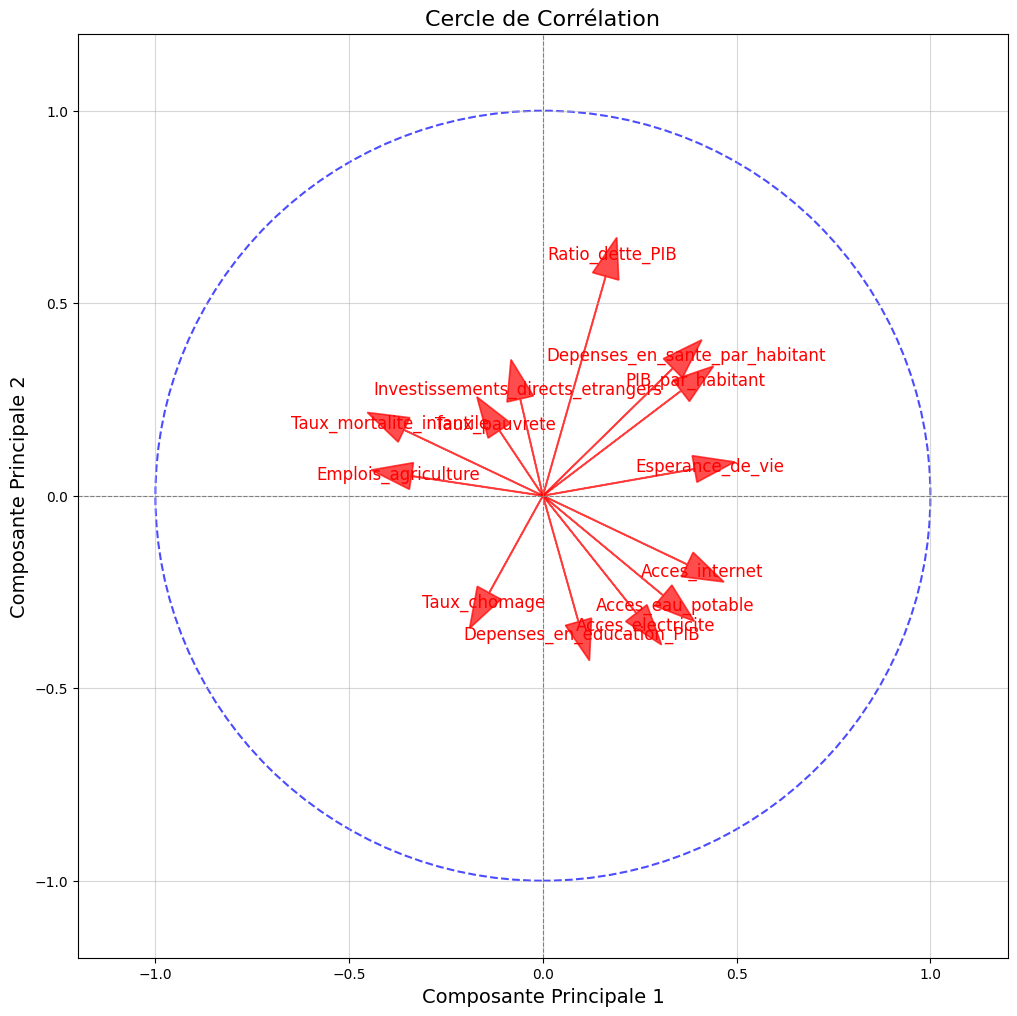

In [95]:
# Cercle de corrélation
components = pca.components_

plt.figure(figsize=(12, 12))  # Increase figure size for better visibility

# Plot arrows representing variable contributions
for i, (x, y) in enumerate(components.T[:13]):  
    plt.arrow(0, 0, x, y, color='r', alpha=0.7, head_width=0.07, linewidth=1.2)  # Larger arrows
    plt.text(x * 1.1, y * 1.1, colonnes_numeriques[i], color='r', fontsize=12, ha='center', va='center')  # Label with selected variables

# Draw a larger circle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=1.5, alpha=0.7)
plt.gca().add_artist(circle)

# Adjust limits and labels
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('Composante Principale 1', fontsize=14)
plt.ylabel('Composante Principale 2', fontsize=14)
plt.title('Cercle de Corrélation', fontsize=16)
plt.grid(alpha=0.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

plt.show()

1. Composante Principale 1 : Niveau de Développement

   * Corrélations positives : Les variables telles que PIB par habitant, espérance de vie, accès à internet, dépenses en santé, et accès à l'eau potable représentent effectivement des indicateurs de développement humain et économique. Ces variables tendent à augmenter ensemble dans des pays plus développés.

   * Corrélations négatives : Emplois dans l'agriculture et taux de mortalité infantile sont des indicateurs souvent associés à des pays en voie de développement, s'opposant donc logiquement aux indicateurs de développement.

2. Composante Principale 2 : Structure Économique et Financière

   * Corrélations positives : Ratio dette/PIB et investissements directs étrangers reflètent bien les aspects financiers.

   * Corrélations négatives : Le taux de chômage en tant que variable négative est cohérent, car une économie dynamique attirant des investissements tend à réduire le chômage.
  
3. Observations importantes :
- Les variables de développement humain (santé, éducation, espérance de vie) sont fortement corrélées entre elles
- L'emploi agricole s'oppose aux indicateurs de développement
- Certaines variables sont moins bien représentées car plus proches du centre du cercle (leurs vecteurs sont plus courts)

Cette visualisation confirme que :
1. La première composante capture principalement le niveau de développement global
2. La seconde composante reflète plutôt la structure économique et financière des pays

# CAH

**Question :** Comment les pays asiatiques se regroupent-ils en fonction de leur developpemen socio-economique?

### 1. Tracer le dendrogramme 

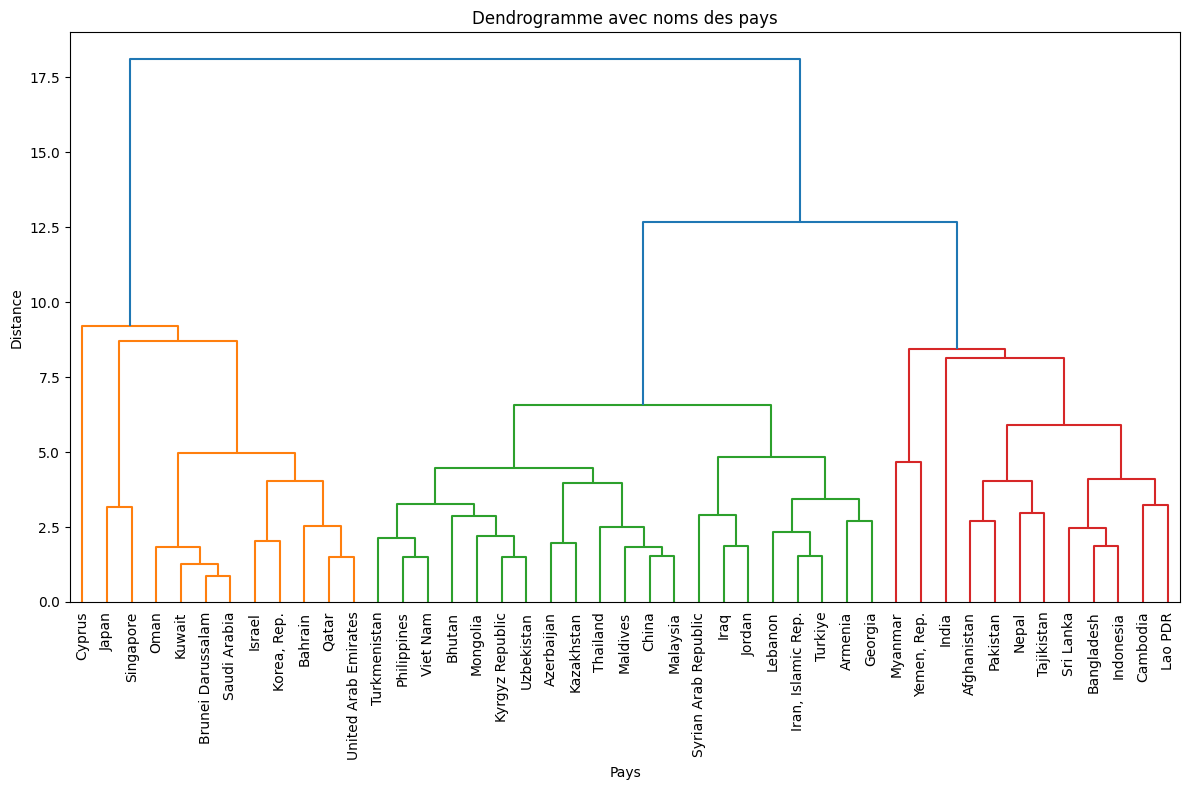

In [96]:
# Créer une matrice de linkage pour le dendrogramme
country_names = df['Country'] 
linkage_matrix = linkage(X_scaled, method='ward')

# Afficher le dendrogramme
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=country_names.values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogramme avec noms des pays")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

### 2. Determiner les clusters

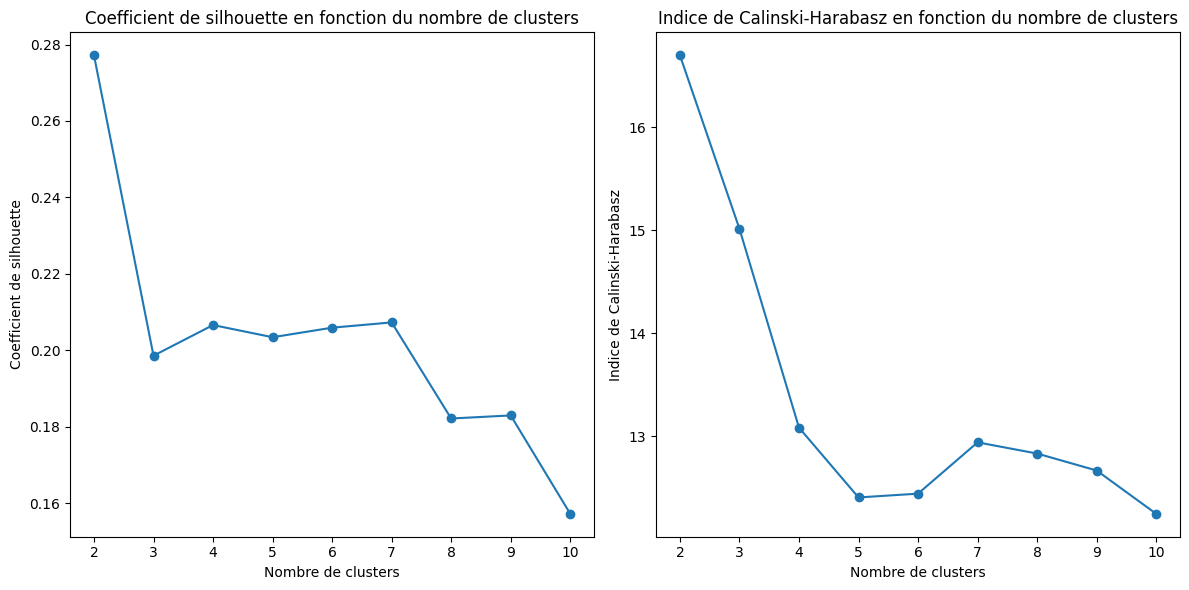

Nombre de clusters : 2, Coefficient de silhouette : 0.2771879183104664, Indice de Calinski-Harabasz : 16.700358522976973
Nombre de clusters : 3, Coefficient de silhouette : 0.198589836665764, Indice de Calinski-Harabasz : 15.016019388241958
Nombre de clusters : 4, Coefficient de silhouette : 0.20661243887777958, Indice de Calinski-Harabasz : 13.085704117323028
Nombre de clusters : 5, Coefficient de silhouette : 0.20342295963400783, Indice de Calinski-Harabasz : 12.408035541901201
Nombre de clusters : 6, Coefficient de silhouette : 0.20592277131882747, Indice de Calinski-Harabasz : 12.44485159500292
Nombre de clusters : 7, Coefficient de silhouette : 0.20730010109870203, Indice de Calinski-Harabasz : 12.942801795687544
Nombre de clusters : 8, Coefficient de silhouette : 0.18216577271611534, Indice de Calinski-Harabasz : 12.834257912909743
Nombre de clusters : 9, Coefficient de silhouette : 0.1829660153611694, Indice de Calinski-Harabasz : 12.669428467914425
Nombre de clusters : 10, Coef

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import fcluster

silhouette_scores = []
calinski_harabasz_scores = []
for n_clusters in range(2, 11):
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    if len(set(clusters)) > 1:
        silhouette_scores.append(silhouette_score(X_scaled, clusters))
        calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, clusters))
    else:
        silhouette_scores.append(0)  
        calinski_harabasz_scores.append(0)  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
plt.title("Coefficient de silhouette en fonction du nombre de clusters")

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Indice de Calinski-Harabasz")
plt.title("Indice de Calinski-Harabasz en fonction du nombre de clusters")

plt.tight_layout()
plt.show()

# Afficher aussi les valeurs numériques pour plus de précision
for n_clusters in range(2, 11):
  clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
  if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X_scaled, clusters)
    calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
    print(f"Nombre de clusters : {n_clusters}, Coefficient de silhouette : {silhouette_avg}, Indice de Calinski-Harabasz : {calinski_harabasz}")

### 3. Appliquer Cah et determiner les moyennes de chaque cluster

In [98]:
n_clusters = 2
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
df['CAH_Cluster'] = clusters

In [99]:
cluster_means = df.groupby('CAH_Cluster')[colonnes_numeriques].mean() 
print(cluster_means)

             PIB_par_habitant  Depenses_en_education_PIB  Esperance_de_vie  \
CAH_Cluster                                                                  
1                34323.715186                   4.778547         79.625043   
2                 3894.204579                   3.909777         71.730333   

             Depenses_en_sante_par_habitant  Taux_mortalite_infantile  \
CAH_Cluster                                                             
1                               2179.143448                  5.791667   
2                                277.973832                 23.760606   

             Acces_electricite  Acces_eau_potable  Taux_pauvrete  \
CAH_Cluster                                                        
1                   100.000000          99.111154       1.544048   
2                    96.539394          91.810609       2.185281   

             Taux_chomage  Acces_internet  Ratio_dette_PIB  \
CAH_Cluster                                                

L'analyse des moyennes des variables confirme clairement la distinction entre deux groupes de pays :

**Cluster 1 : Pays développés ou à revenu élevé.**
Ils se caractérisent par un PIB par habitant élevé, une espérance de vie longue, de faibles taux de mortalité infantile et de pauvreté, un accès quasi universel aux services de base (électricité, eau potable, internet), un faible taux de chômage et une faible proportion d'emplois dans l'agriculture. Le ratio dette/PIB plus élevé et les IDE négatifs demandent une investigation plus approfondie.

**Cluster 2 : Pays en développement ou à revenu faible/intermédiaire.** 
Ils présentent des caractéristiques opposées au Cluster 1 : PIB par habitant plus faible, espérance de vie plus courte, taux de mortalité infantile et de pauvreté plus élevés, accès plus limité aux services de base, taux de chômage plus élevé et une proportion importante d'emplois dans l'agriculture.


Cette analyse basée sur la CAH permet de segmenter les pays en deux groupes distincts en fonction de leurs indicateurs de développement. C'est une information précieuse pour des études comparatives, des analyses économiques ou des politiques de développement.

### 4. Visualisation des clusters 

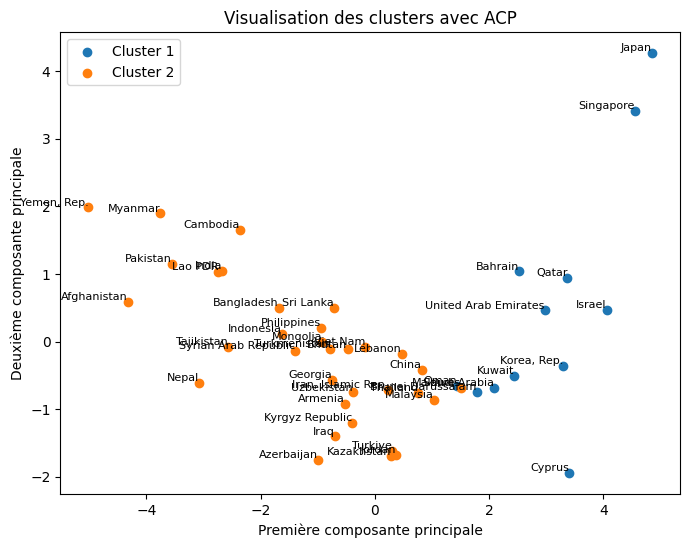

In [100]:
plt.figure(figsize=(8, 6))
for i in range(1, n_clusters + 1):
    plt.scatter(X_pca[df['CAH_Cluster'] == i, 0], X_pca[df['CAH_Cluster'] == i, 1], label=f'Cluster {i}')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation des clusters avec ACP')
plt.legend()

for i, country in enumerate(country_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=8, ha='right', va='bottom')

plt.show()

-Cluster 1 (points bleus) : Ces points sont principalement situés dans la partie droite du graphique, avec des valeurs plus élevées sur la première composante principale (CP1).

-Cluster 2 (points orange) : Ces points sont concentrés dans la partie gauche du graphique, avec des valeurs plus basses sur la CP1.

Cette séparation claire indique que la CAH a réussi à identifier deux groupes distincts de pays en fonction de leurs caractéristiques socio-économiques. La première composante principale (CP1) semble être un facteur discriminant majeur entre les deux clusters.



---

*Comment les pays asiatiques se regroupent-ils en fonction de leur développement socio-économique ?*

Sur la base de cette visualisation et de l'analyse des moyennes des variables que nous avons faite précédemment, nous pouvons conclure que les pays asiatiques se regroupent en deux catégories principales :

**Un groupe de pays (Cluster 1, points bleus) avec un niveau de développement socio-économique plus élevé :** Ces pays ont tendance à avoir un PIB par habitant plus élevé, une meilleure espérance de vie, un accès plus large aux services de base (électricité, eau potable, internet), un taux de mortalité infantile plus faible, etc. Ils sont caractérisés par des valeurs plus élevées sur la CP1.

**Un groupe de pays (Cluster 2, points orange) avec un niveau de développement socio-économique moins élevé :** Ces pays présentent des caractéristiques opposées, avec un PIB par habitant plus faible, une espérance de vie plus courte, un accès plus limité aux services de base, un taux de mortalité infantile plus élevé, etc. Ils sont caractérisés par des valeurs plus basses sur la CP1.